# Topological Features (for Real Data)

In [1]:
import numpy as np
import pandas as pd
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Amplitude

In [2]:
DATA = "../GAN_exp_dog"

In [3]:
PE = PersistenceEntropy()
AMP = Amplitude(metric="wasserstein")

In [4]:
xt_real_epoch_500 = np.load(f"{DATA}/Xt_real.npy")

In [5]:
entropy_real_epoch_500 = PE.fit_transform(xt_real_epoch_500)

In [6]:
amps_real_epoch_500 = AMP.fit_transform(xt_real_epoch_500)

In [7]:
entropy_real_epoch_500

array([[9.94054004, 7.50006937, 5.34289561]])

In [8]:
amps_real_epoch_500

array([[350.51887698,   5.90310866,   1.25683615]])

# Topological Features (for Generated Data)

In [9]:
epochs = list(range(9, 500, 10))

xt_epoch_500 = {}
entropy_epoch_500 = {}
amps_epoch_500 = {}

for i in epochs:
    file_path = f"{DATA}/Xt_epoch_{i}.npy"
    xt_epoch_500[i] = np.load(file_path)
    # Do something with xt_i, like storing it in a dictionary or processing it
    entropy_epoch_500[i] = PE.fit_transform(xt_epoch_500[i])
    # conjecture: lifespansum is proportional to wasserstein distance from trivial (diagonal) diagram
    amps_epoch_500[i] = AMP.fit_transform(xt_epoch_500[i])

In [10]:
entropy_epoch_500

{9: array([[9.92383873, 9.36816153, 8.6258262 ]]),
 19: array([[9.95265957, 9.98902338, 9.83302772]]),
 29: array([[ 9.95174734, 10.04520509, 10.00372382]]),
 39: array([[ 9.95463869, 10.13544023, 10.23346159]]),
 49: array([[ 9.95148657, 10.06786755, 10.05831456]]),
 59: array([[ 9.94542717, 10.07174487,  9.84740845]]),
 69: array([[9.92250111, 9.30075086, 8.16342987]]),
 79: array([[9.9278672 , 9.12892954, 7.99562806]]),
 89: array([[9.95335869, 9.78689214, 9.31293729]]),
 99: array([[9.9463682 , 9.47808561, 8.60715515]]),
 109: array([[9.94372723, 8.94644976, 7.42800027]]),
 119: array([[9.94969263, 9.15536892, 7.97805517]]),
 129: array([[9.94883466, 8.70589458, 7.06495727]]),
 139: array([[9.95048896, 9.07562986, 7.94230281]]),
 149: array([[9.94235908, 8.7357057 , 7.57427184]]),
 159: array([[9.94679543, 8.90782178, 7.68175372]]),
 169: array([[9.95015596, 8.91901112, 7.773477  ]]),
 179: array([[9.94685388, 8.58345962, 6.93488727]]),
 189: array([[9.94522729, 8.43501982, 6.52567

In [11]:
amps_epoch_500

{9: array([[165.90710296,  21.23911116,   7.89793939]]),
 19: array([[238.21457679,  28.25568825,  13.98488969]]),
 29: array([[274.34404437,  27.88077268,  12.7181515 ]]),
 39: array([[330.89468561,  32.50103176,  17.18679367]]),
 49: array([[303.10527322,  29.01579065,  15.43241901]]),
 59: array([[273.4261779 ,  23.16101115,  10.68652299]]),
 69: array([[248.7214577 ,  14.70964407,   5.07823173]]),
 79: array([[314.24458567,  16.25174219,   5.56760069]]),
 89: array([[291.09423235,  20.07322326,   8.13437002]]),
 99: array([[341.5053976 ,  17.84234993,   6.45773822]]),
 109: array([[321.01305583,  11.90682622,   3.37292668]]),
 119: array([[329.06378399,  11.52186385,   3.7778491 ]]),
 129: array([[340.12345561,   9.67001241,   2.90949532]]),
 139: array([[357.79159232,  12.65973273,   4.16083426]]),
 149: array([[366.80641826,  11.36136649,   3.44686471]]),
 159: array([[351.17513765,  12.31007804,   4.02172353]]),
 169: array([[365.44787163,  11.64886228,   3.61198362]]),
 179: ar

In [12]:
# ChatGPT Generated Code

# Flatten the nested arrays
def flatten_dict(d):
    flattened_dict = {}
    for key, value in d.items():
        flattened_dict[key] = value.flatten()
    return flattened_dict

flattened_entropy_epoch_500 = flatten_dict(entropy_epoch_500)
flattened_amps_epoch_500 = flatten_dict(amps_epoch_500)

# Convert dictionaries to dataframes
entropy_df = pd.DataFrame.from_dict(flattened_entropy_epoch_500, orient='index', columns=['H0', 'H1', 'H2'])
entropy_df.index.name = 'epoch'
amps_df = pd.DataFrame.from_dict(flattened_amps_epoch_500, orient='index', columns=['H0', 'H1', 'H2'])
amps_df.index.name = 'epoch'

# Reset index name for both dataframes
entropy_df.reset_index(inplace=True)
amps_df.reset_index(inplace=True)

print("Entropy DataFrame:")
print(entropy_df)

print("\nAmplitude DataFrame:")
print(amps_df)

Entropy DataFrame:
    epoch        H0         H1         H2
0       9  9.923839   9.368162   8.625826
1      19  9.952660   9.989023   9.833028
2      29  9.951747  10.045205  10.003724
3      39  9.954639  10.135440  10.233462
4      49  9.951487  10.067868  10.058315
5      59  9.945427  10.071745   9.847408
6      69  9.922501   9.300751   8.163430
7      79  9.927867   9.128930   7.995628
8      89  9.953359   9.786892   9.312937
9      99  9.946368   9.478086   8.607155
10    109  9.943727   8.946450   7.428000
11    119  9.949693   9.155369   7.978055
12    129  9.948835   8.705895   7.064957
13    139  9.950489   9.075630   7.942303
14    149  9.942359   8.735706   7.574272
15    159  9.946795   8.907822   7.681754
16    169  9.950156   8.919011   7.773477
17    179  9.946854   8.583460   6.934887
18    189  9.945227   8.435020   6.525674
19    199  9.946732   8.483877   6.684694
20    209  9.945735   8.664108   7.057614
21    219  9.947896   8.915794   7.422857
22    229  9.94

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

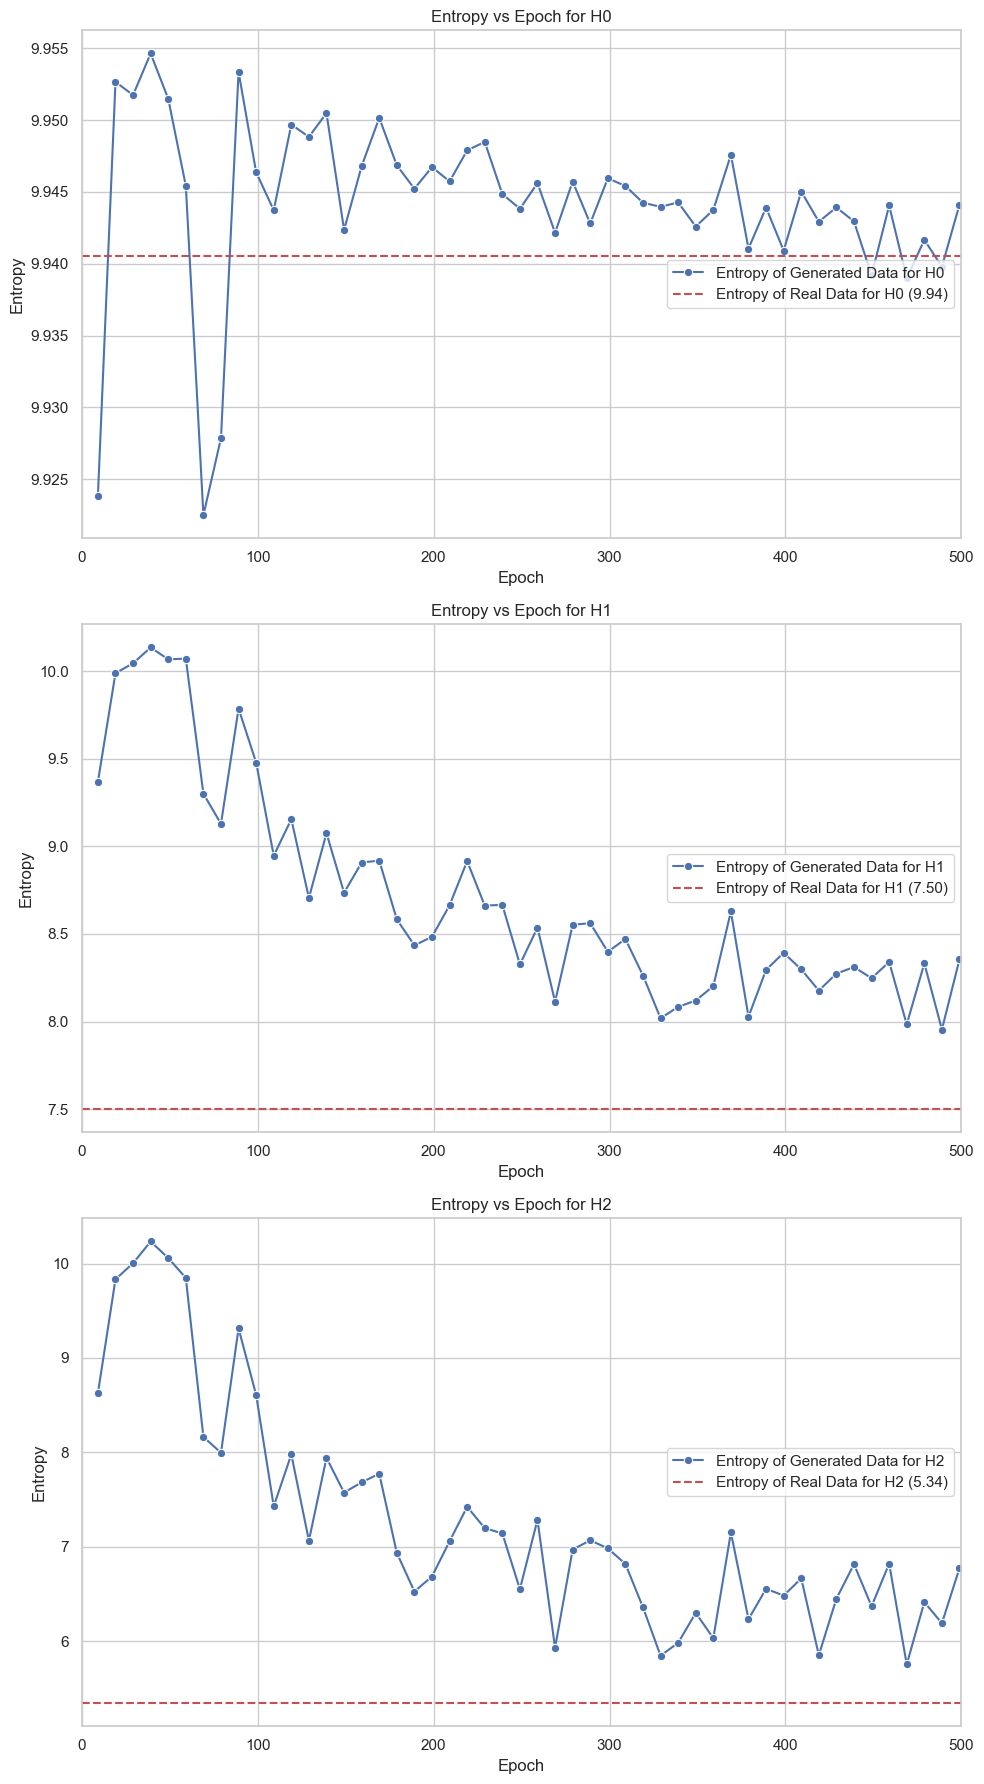

In [14]:
# Create subplots with 3 rows
fig, axes = plt.subplots(nrows=3, figsize=(10, 18))

#colors = ['b', 'r', 'g']

# Plot the data for entropy values in separate subplots
for i, label in enumerate(['H0', 'H1', 'H2']):
    sns.lineplot(x='epoch', y=label, data=entropy_df, marker='o', linestyle='-', label=f'Entropy of Generated Data for {label}', color='b', ax=axes[i])
    axes[i].axhline(y=entropy_real_epoch_500[0,i], color='r', linestyle='--', label=f'Entropy of Real Data for {label} ({entropy_real_epoch_500[0,i]:.2f})')
    
    # Set plot labels and title for each subplot
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Entropy')
    axes[i].set_title(f'Entropy vs Epoch for {label}')
    axes[i].set_xlim(0, 500)  # Adjust the limits based on your data
    # axes[i].set_ylim(5, 11)  # Adjust the limits based on your data

    # Add a legend for each subplot
    axes[i].legend(loc='center right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

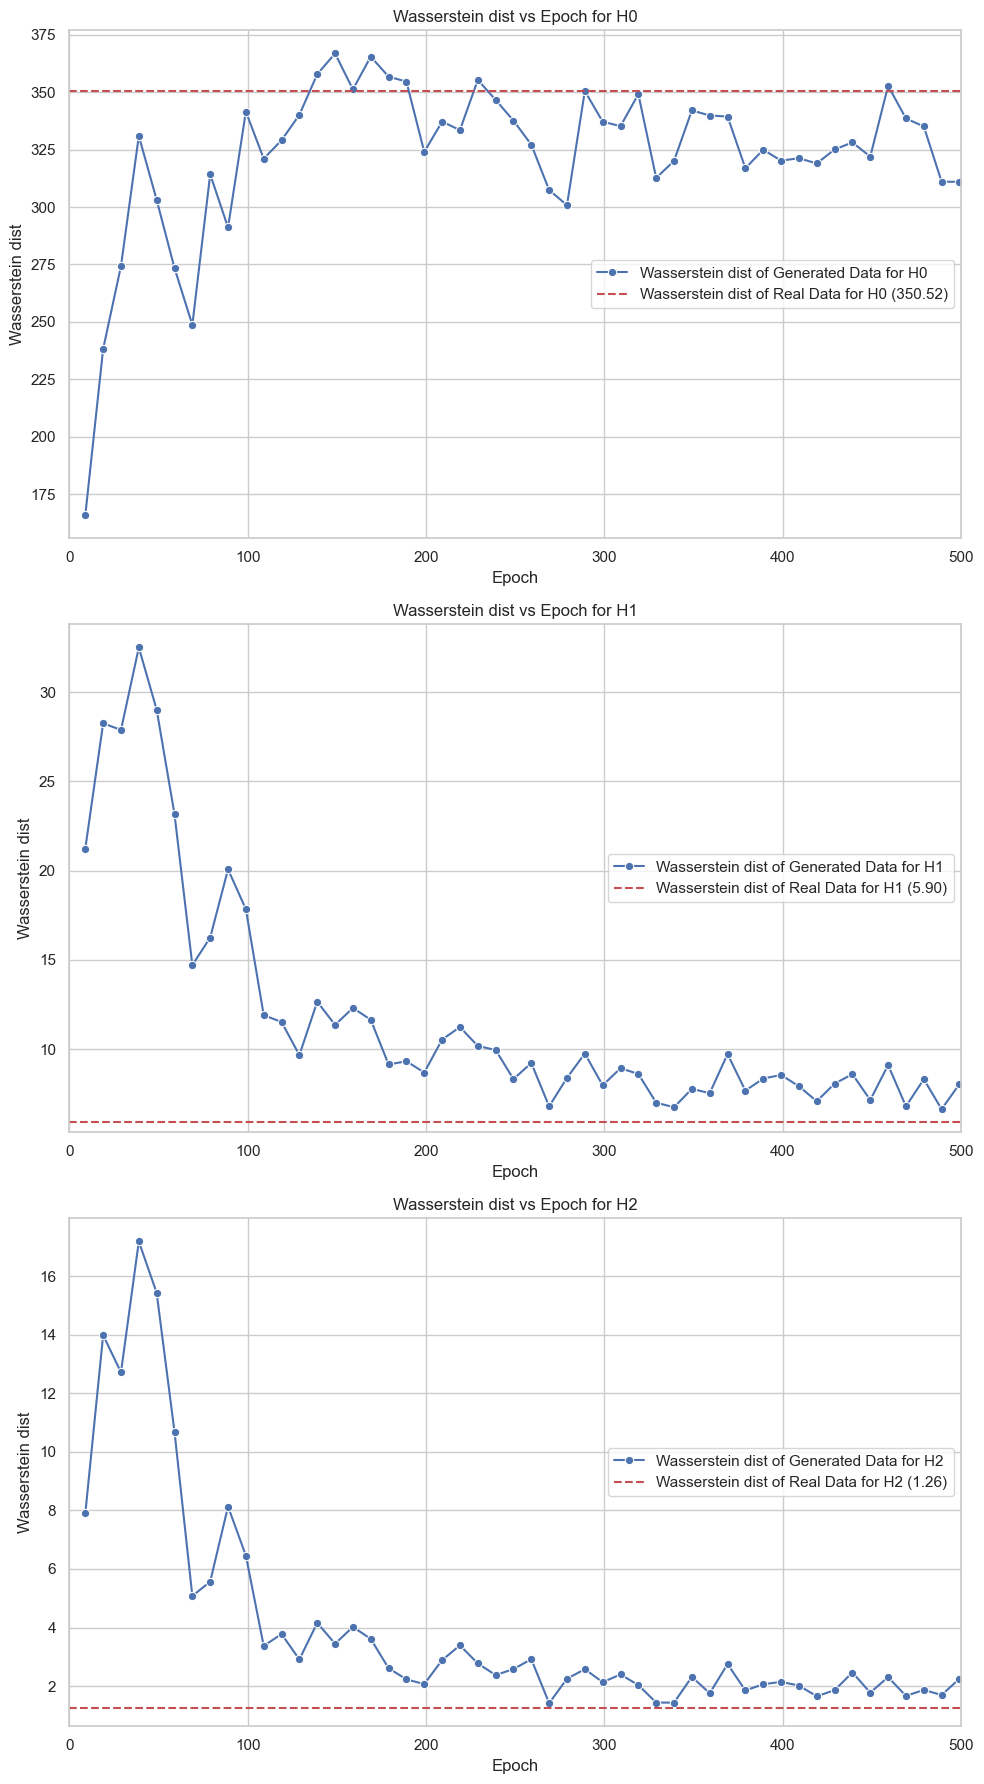

In [15]:
# Create subplots with 3 rows
fig, axes = plt.subplots(nrows=3, figsize=(10, 18))

#colors = ['b', 'r', 'g']

# Plot the data for entropy values in separate subplots
for i, label in enumerate(['H0', 'H1', 'H2']):
    sns.lineplot(x='epoch', y=label, data=amps_df, marker='o', linestyle='-', label=f'Wasserstein dist of Generated Data for {label}', color='b', ax=axes[i])
    axes[i].axhline(y=amps_real_epoch_500[0,i], color='r', linestyle='--', label=f'Wasserstein dist of Real Data for {label} ({amps_real_epoch_500[0,i]:.2f})')

    
    # Set plot labels and title for each subplot
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Wasserstein dist')
    axes[i].set_title(f'Wasserstein dist vs Epoch for {label}')
    axes[i].set_xlim(0, 500)  # Adjust the limits based on your data
    # axes[i].set_ylim(5, 11)  # Adjust the limits based on your data

    # Add a legend for each subplot
    axes[i].legend(loc='center right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()